In [1]:
import numpy as np
import pandas as pd
from SiFoN import viz
%matplotlib inline

### Case study for the `viz` module

In this case, we have Sei predictions for the chr10:89580225-89633389 which is near the PTEN gene. `vcf` should be a .vcf file containing genomic coordinates and ref/alt identities for each SNP in your region of interest. The `file` should be a numpy array of sequence class scores, such that rows correspond to the rows in `vcf`. You can also select `TSS` or any other regions to label and denote in the graph. In this case, we make note of the Sheng PTEN Promoter.

In [4]:
file = "test_input_data/chr10_89580225_89633389_sequence_class_scores.npy"
vcf = pd.read_csv("test_input_data/chr10_89580225_89633389.vcf", 
                  header=None, sep="\t", 
                  names=["Chromosome", "Position", "SNP", "Ref", "Alt"])
wid = 400
PTEN_TSS = {
    'RefSeqTSS Promoter': [89623382 - wid, 89623382 + wid],
    'CLEVER FANTOM CAGE Promoter': [89623389 - wid, 89623389 + wid],
    'UCSC genome browser':[89623195 - wid, 89623195 + wid],
    'Sheng PTEN Promoter' : [89622930, 89624219]
}

Next, we use `plot_from_scores` to visualize the maximum predictions in this region. `filename` is the name of the output file. The `signed` parameter signals whether or not maximums are plotted as absolute values or not. `plot_by` should be "class" (the maximum scoring class out of all 40 sequence classes) or "category"  (the maximum within each category (e.g. E Enhancer, HET Heterochromatin, etc.)). Sei outputs three scores corresponding to each potential alteration at that position (in this case: G>A, G>C, G>T). Set `pre` = True include all of these alterations. This will call the `pre` function which takes the maximum of the three positions. If you already have a single prediction per position, then set `pre` = False.

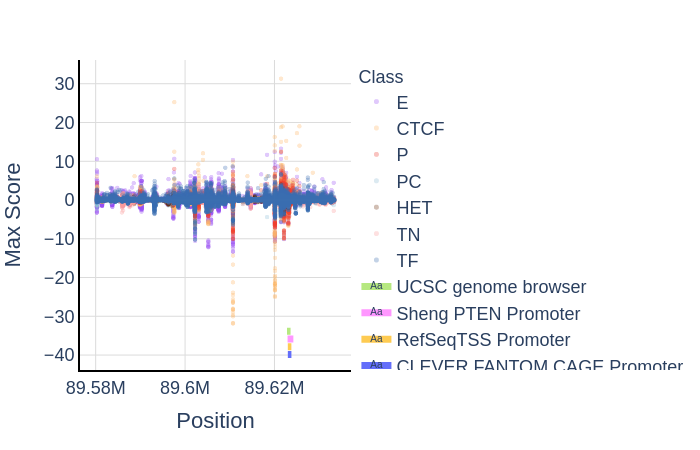

In [5]:
viz.plot_from_scores(filename="test_output_plots/viz_by_category_signed.html", file=file, 
                     vcf=vcf, TSS=PTEN_TSS, signed=True, plot_by="category", pre=True)

You can also run the intermediate functions for this code to produce the same plots, in case you want to observe and manipulate the data at intermediate steps. If you do this, make sure that the `signed` parameter should be consistent across functions. 

Below are two examples. `find_max` takes the maximum scoring class out of all 40 sequence classes. `find_max_by_category` finds the maximum within each category (e.g. E Enhancer, HET Heterochromatin, etc.) The `signed` parameter again signals whether or not maximums are plotted as absolute values or not. 

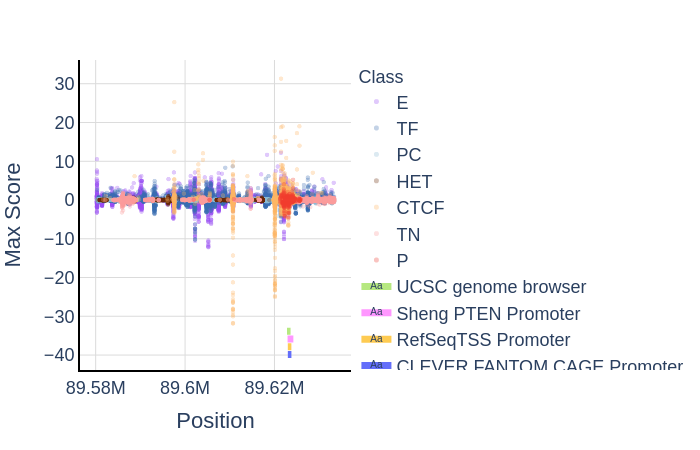

In [9]:
scores_signed = viz.preprocess(file, vcf, signed=True)
max_scores_signed = viz.find_max(scores_signed, signed=True)
viz.plot_max("test_output_plots/viz_by_class_signed.html", max_scores_signed, TSS=PTEN_TSS)

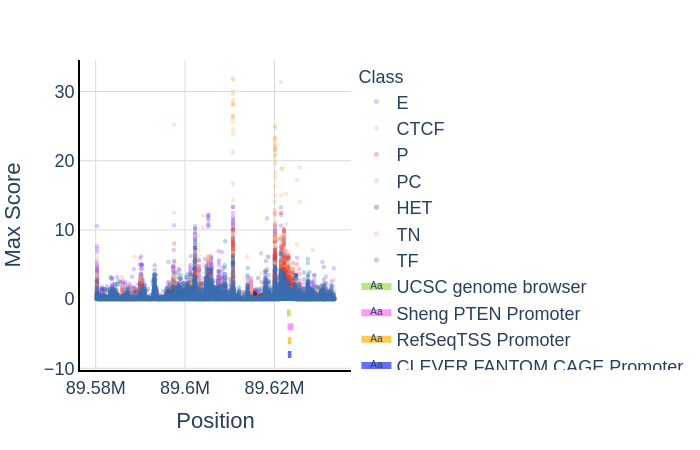

In [8]:
scores_unsigned = viz.preprocess(file, vcf, signed=False)
max_by_cat = viz.find_max_by_category(scores_unsigned, signed=False)
viz.plot_max("test_output_plots/viz_by_category_unsigned.html", max_by_cat, TSS=PTEN_TSS)